In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import cv2

In [2]:
band4 = rasterio.open('LC08_L1TP_186024_20160630_20170323_01_T1/LC08_L1TP_186024_20160630_20170323_01_T1_B4.TIF')
band3 = rasterio.open('LC08_L1TP_186024_20160630_20170323_01_T1/LC08_L1TP_186024_20160630_20170323_01_T1_B3.TIF')
band2 = rasterio.open('LC08_L1TP_186024_20160630_20170323_01_T1/LC08_L1TP_186024_20160630_20170323_01_T1_B2.TIF')

In [3]:
def prepare_to_plot(red, green, blue):
    return np.dstack((red.read()[0]/65535*255, green.read()[0]/65535*255, blue.read()[0]/65535*255)).astype(np.uint8)

<IPython.core.display.Javascript object>


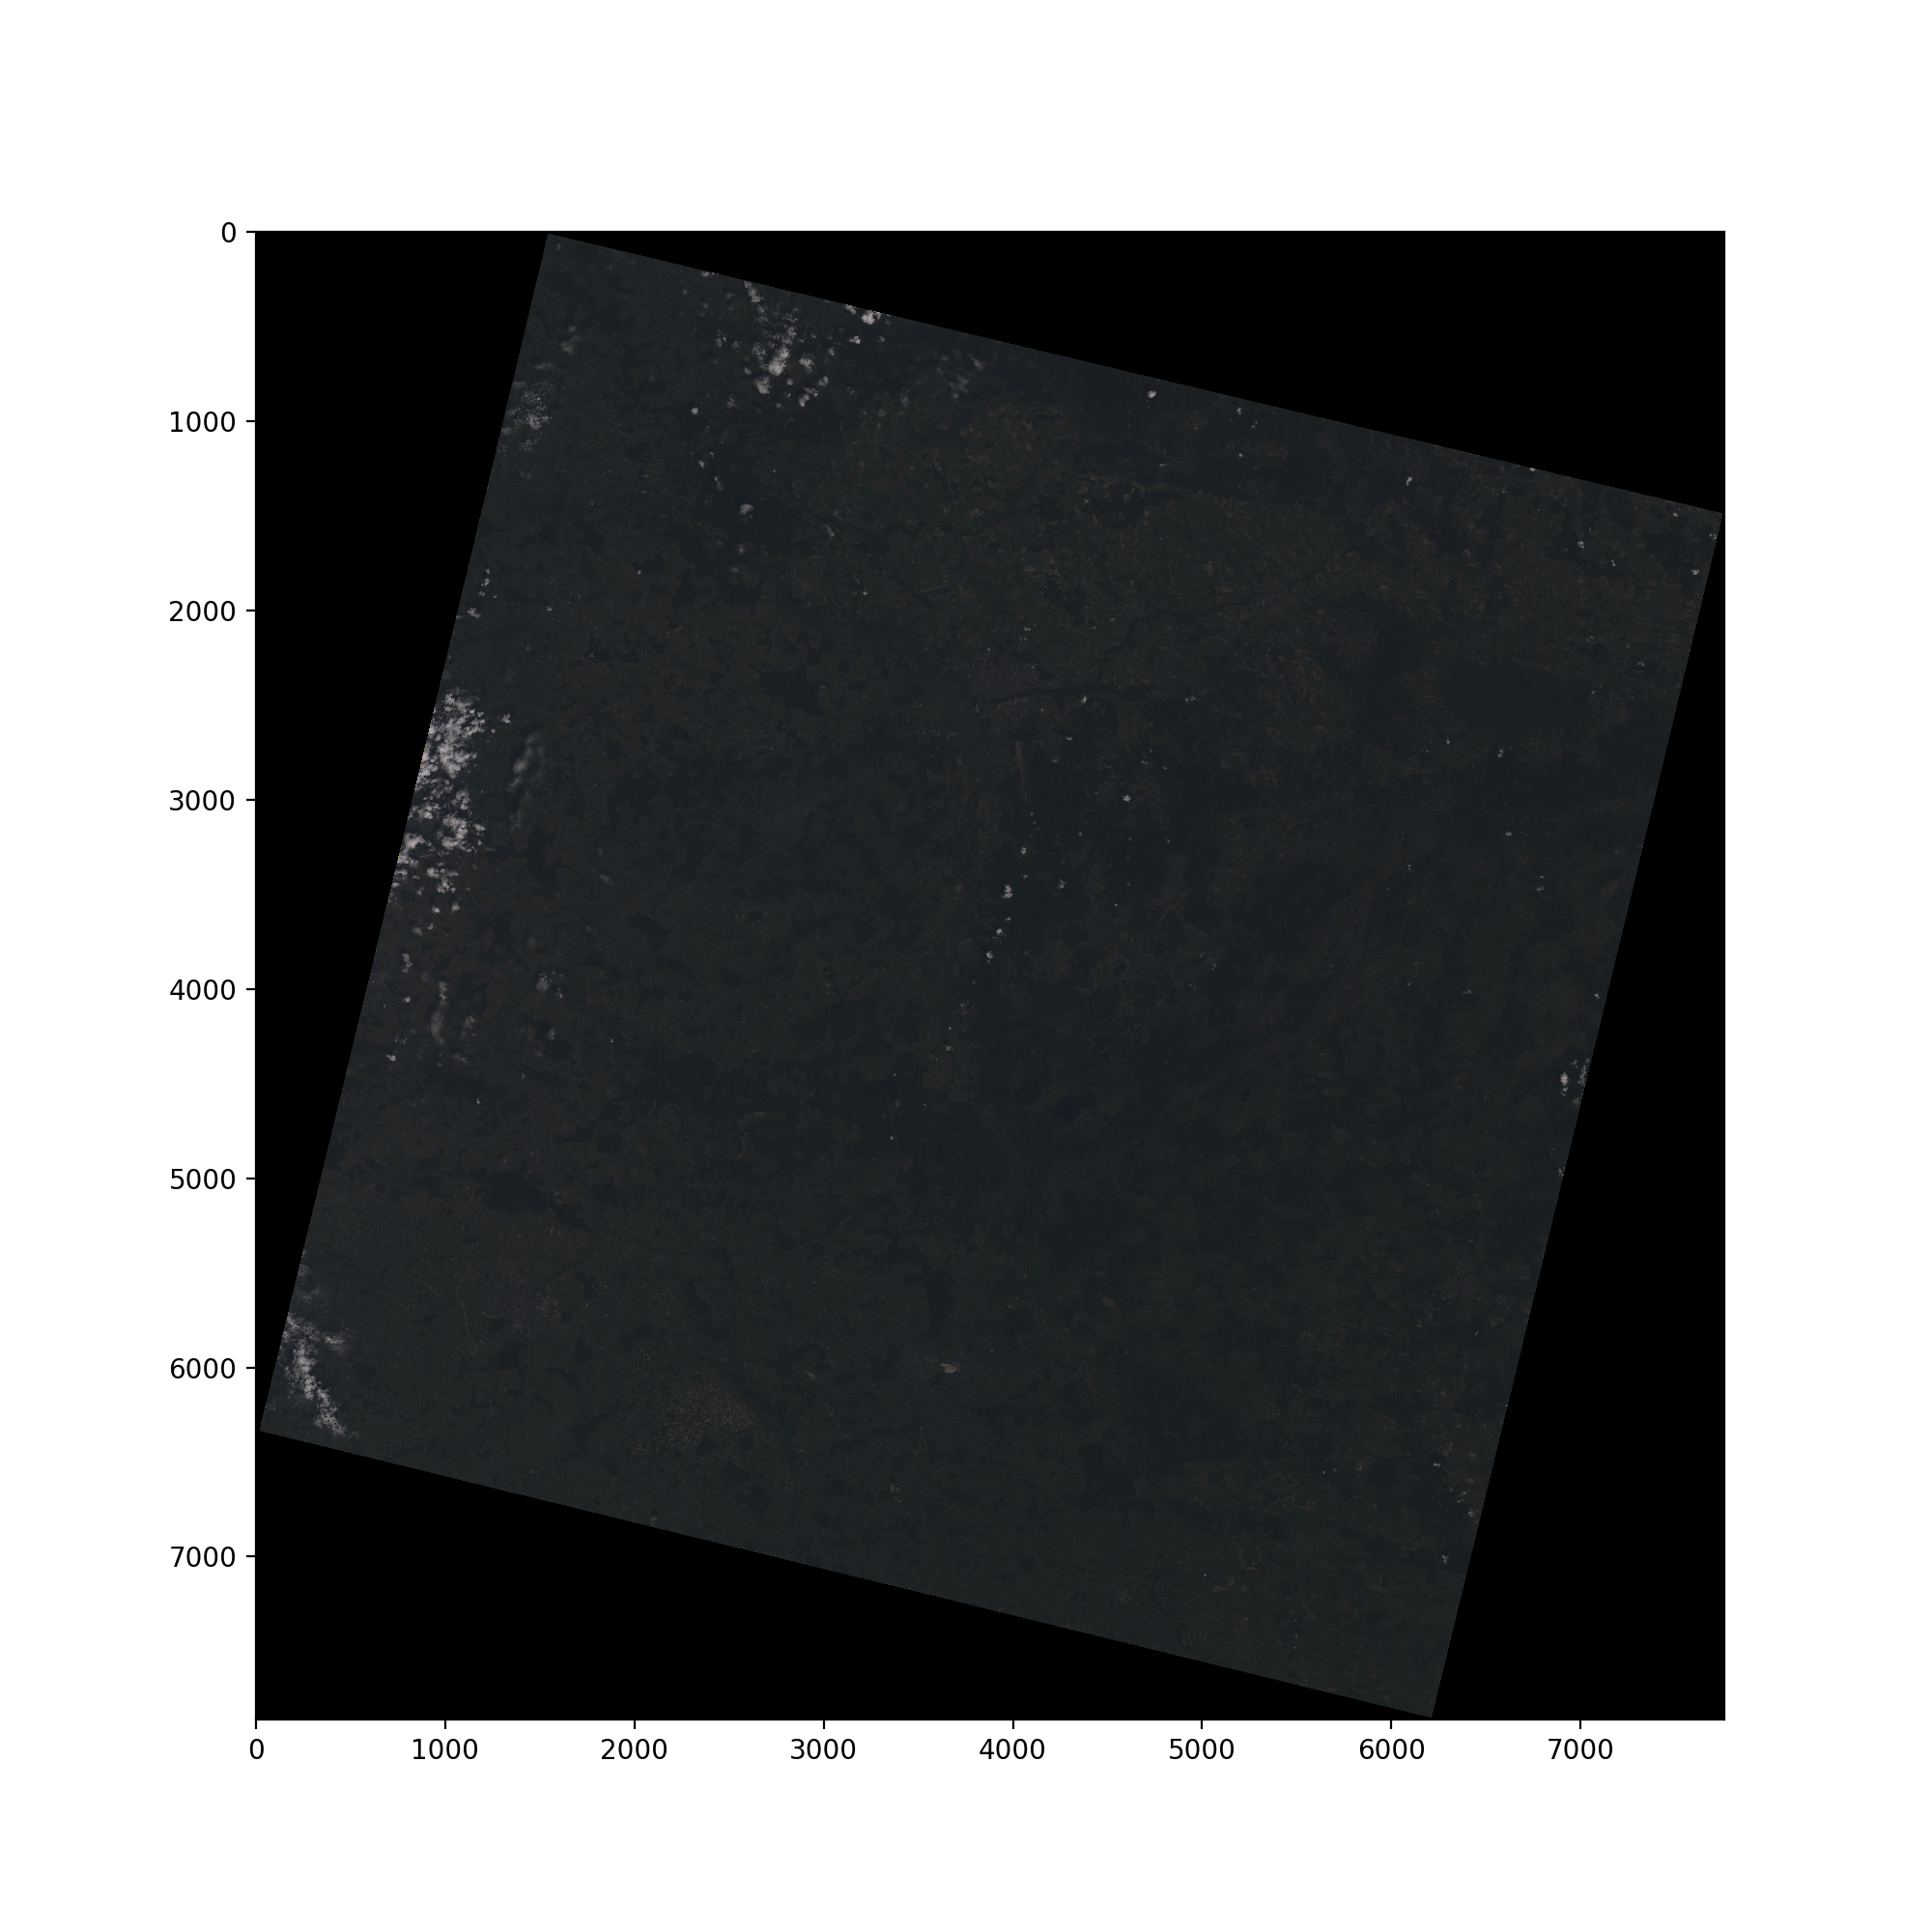

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.imshow(prepare_to_plot(band4, band3, band2))

## *
<b>It's hard to distinguish between colors: the histogram equalization step is needed</b>

<IPython.core.display.Javascript object>


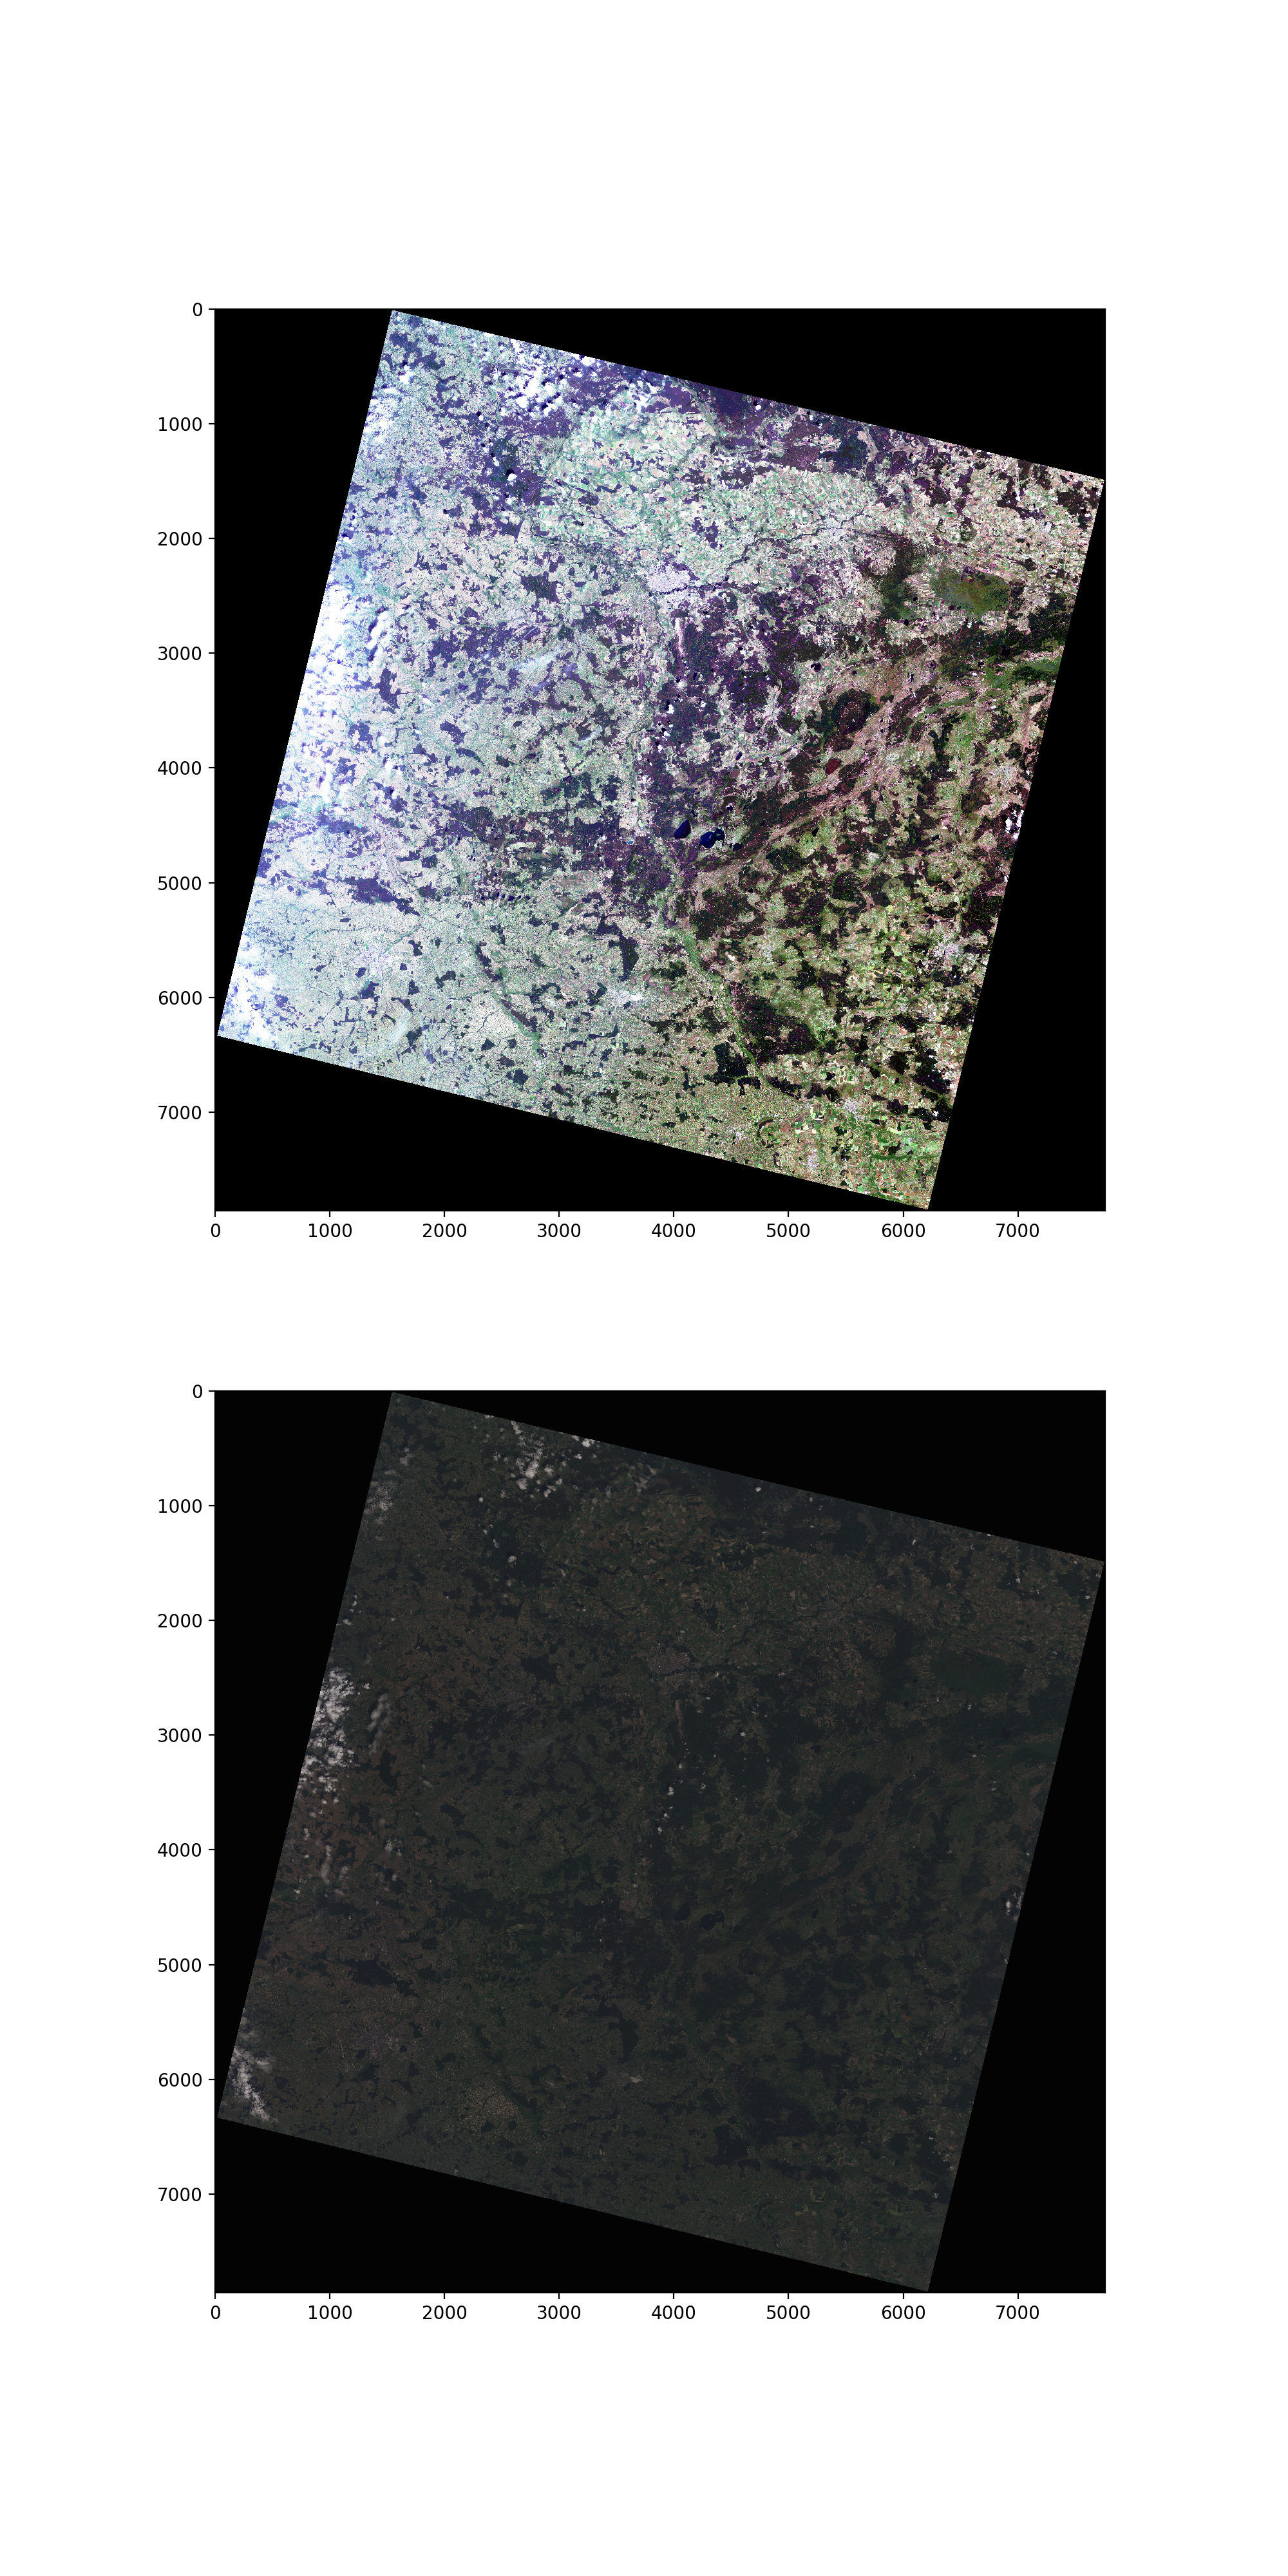

In [5]:
def prepare_plot(red, green, blue, hist_eq='global'):
    """
    Function prepares EO data for plotting (multi-channel data)
    red = Band 4 of Landsat 8
    green = Band 3 of Landsat 8
    blue = Band 2 of Landsat 8
    hist_eq = Histogram equalization technique from OpenCV:
                global = global histogram equalization
                local = local histogram equalization
                None = no equalization
    output = numpy.ndarray of dimensions (width, height, layer)
    """
    
    r = (red.read()[0]/65535 * 255).astype(np.uint8)
    g = (green.read()[0]/65535 * 255).astype(np.uint8)
    b = (blue.read()[0]/65535 * 255).astype(np.uint8)
    
    if hist_eq == 'global':
        r = cv2.equalizeHist(r)
        g = cv2.equalizeHist(g)
        b = cv2.equalizeHist(b)
    elif hist_eq == 'local':
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        r = clahe.apply(r)
        g = clahe.apply(g)
        b = clahe.apply(b)
    elif hist_eq == None:
        pass
    else:
        raise ValueError('You should provide three values: "global", "local" or None. Default is "global".')
        
    output = np.dstack((r, g, b))
    return output
    
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax1.imshow(prepare_plot(band4, band3, band2, 'global'))

ax2 = fig.add_subplot(212)
ax2.imshow(prepare_plot(band4, band3, band2, 'local'))


## End of the Notebook